### Equation

$ (S_t+_dt-S_t)/S_t = \mu d_t + \sigma \sqrt(dt \xi _t) $

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def gbm(n_years =10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0  = 100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    
    mu  = 7% drift
    sigma = 15%
    
    """
    dt = 1/steps_per_year #year/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))  #csi of random numbers
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    
    rets = pd.DataFrame(rets)
    
    prices = s_0*(1+rets).cumprod()
    
    return prices
    

In [14]:
p = gbm(10,n_scenarios = 3)

0     95.464464
1    101.091176
2     98.387148
Name: 0, dtype: float64

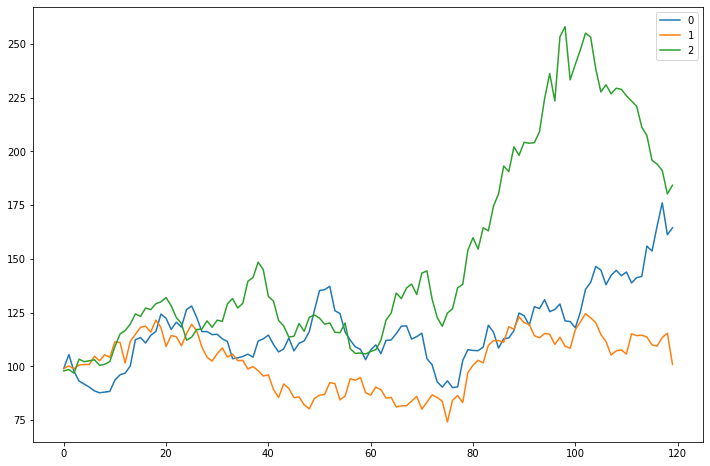

In [15]:
p.plot(figsize = (12,8))

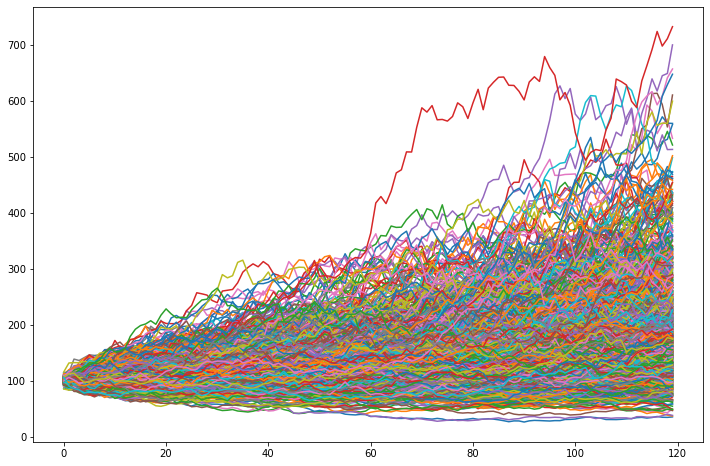

In [12]:
p = gbm(n_years=10,n_scenarios = 1000).plot(figsize = (12,8), legend = False)

In [17]:
def gbm1(n_years =10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0  = 100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    
    mu  = 7% drift up
    sigma = 15%
    
    """
    dt = 1/12 #year/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size =(n_steps, n_scenarios))
    rets = np.random.normal(loc=mu*dt,scale=(sigma*np.sqrt(dt)),size =(n_steps, n_scenarios))
    rets_plus_1[0] = 1
       
    
    prices =s_0*pd.DataFrame(rets_plus_1).cumprod()
    
    return prices
